<a href="https://colab.research.google.com/github/ugrasegehan/IE423/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfFootballPlayers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/task1/final_data.csv')

In [5]:
dfFootballPlayers.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [6]:
dfFootballPlayers.describe(include="all")

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754,10754,10754,10754,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,...,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
unique,10754,374,10584,16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/david-de-gea/profil/spieler/59377,Daejeon Hana Citizen,Paulinho,Defender Centre-Back,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,46,6,1821,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,...,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,NaN,NaN,NaN,NaN,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,...,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,NaN,NaN,NaN,NaN,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,...,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,NaN,NaN,NaN,NaN,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,...,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,NaN,NaN,NaN,NaN,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,...,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000


***Regression Model to Predict Value of Football Player***

We have determined our target as Current Value of the player and changing columns of that value is Highest value, appearance, minutes played, awards, assists, goals and encoded position according to given dataset.

In [7]:
X = dfFootballPlayers.loc[:,['highest_value','appearance','minutes played','award','assists','goals','position_encoded']]
Y = dfFootballPlayers.loc[:,['current_value']]

We have fitted our linear regression model and finding it's intercept with coefficients.

In [8]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X,Y)

#Displaying regression model

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n ', reg.coef_)



Intercept: 
 [-588238.71157643]
Coefficients: 
  [[ 6.09337463e-01 -5.34397564e+04  1.12348155e+03 -4.79088389e+05
   1.25144570e+06  8.81868348e+05  1.29623879e+05]]


Now, we are trying our model with randomly given values to predict the current value fo the player ( can be think as the value at the end of the season)


In [14]:


new_highest_value= 4.500000e+05
new_appearance= 24.000
new_minutes_played= 950.0000
new_award= 0.000000
new_assists= 4.000
new_goals= 3.000
new_position_encoded= 3.00000

print ('Predicted Value: \n', reg.predict([[new_highest_value,new_appearance,new_minutes_played,new_award,new_assists,
                                           new_goals,new_position_encoded]]))

Predicted Value: 
 [[7510975.92989805]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Exploratory Data Analysis Part**




To see what is the current value of players, at which points they gather, we have set following graph:


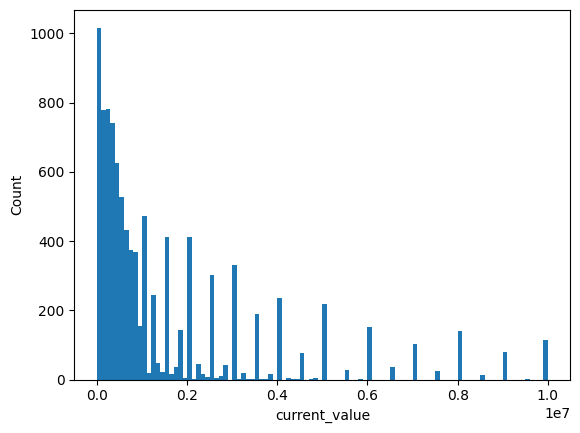

In [10]:
# Set data fields
y = dfFootballPlayers.loc[:,'current_value']

# Set histogram parameters
binwidth = 100000.0
binrange=np.arange(min(y), 10000000 + binwidth, binwidth)

# Show plot
plt.hist(y, bins=binrange)
plt.xlabel('current_value')
plt.ylabel('Count')
plt.show()

This is the graph of how highest value of a player affects the player's current value. As it is seen, distraction does not occur so much but it exists some players who has less valued than their highest value and some that can excess their highest potential.

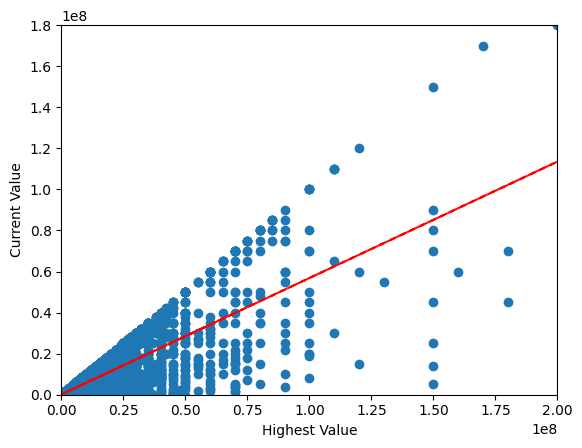

In [11]:
# Set data fields
x = dfFootballPlayers.loc[:,'highest_value']
y = dfFootballPlayers.loc[:,'current_value']

# Generate trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Show plot
plt.scatter(x, y)
plt.plot(x,p(x),"r--")
plt.xlim(0,np.max(dfFootballPlayers.loc[:,'highest_value']))
plt.ylim(0,np.max(dfFootballPlayers.loc[:,'current_value']))
plt.xlabel('Highest Value')
plt.ylabel('Current Value')
plt.show()

We have checked what are the distribution of players according to each feature given in the dataset.

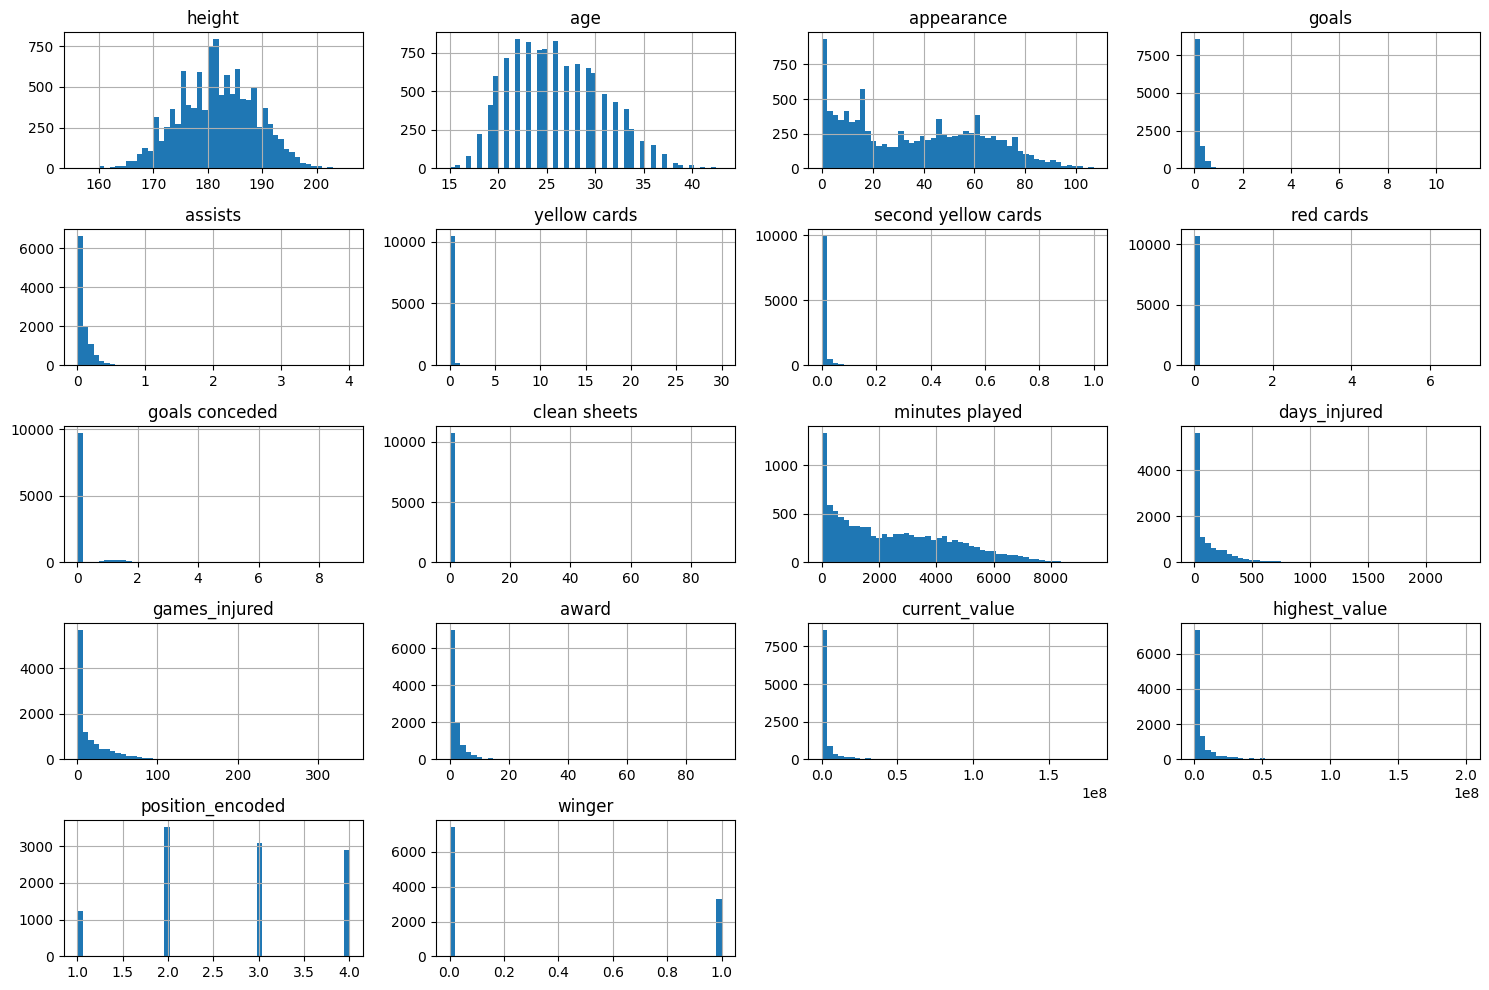

In [12]:
dfFootballPlayers.hist(figsize=(15,10),bins=50)
plt.tight_layout()
plt.show()

In [ ]:
These are the graphs of how each feature affects the current value of a player. Only current value affecting features are plotted.

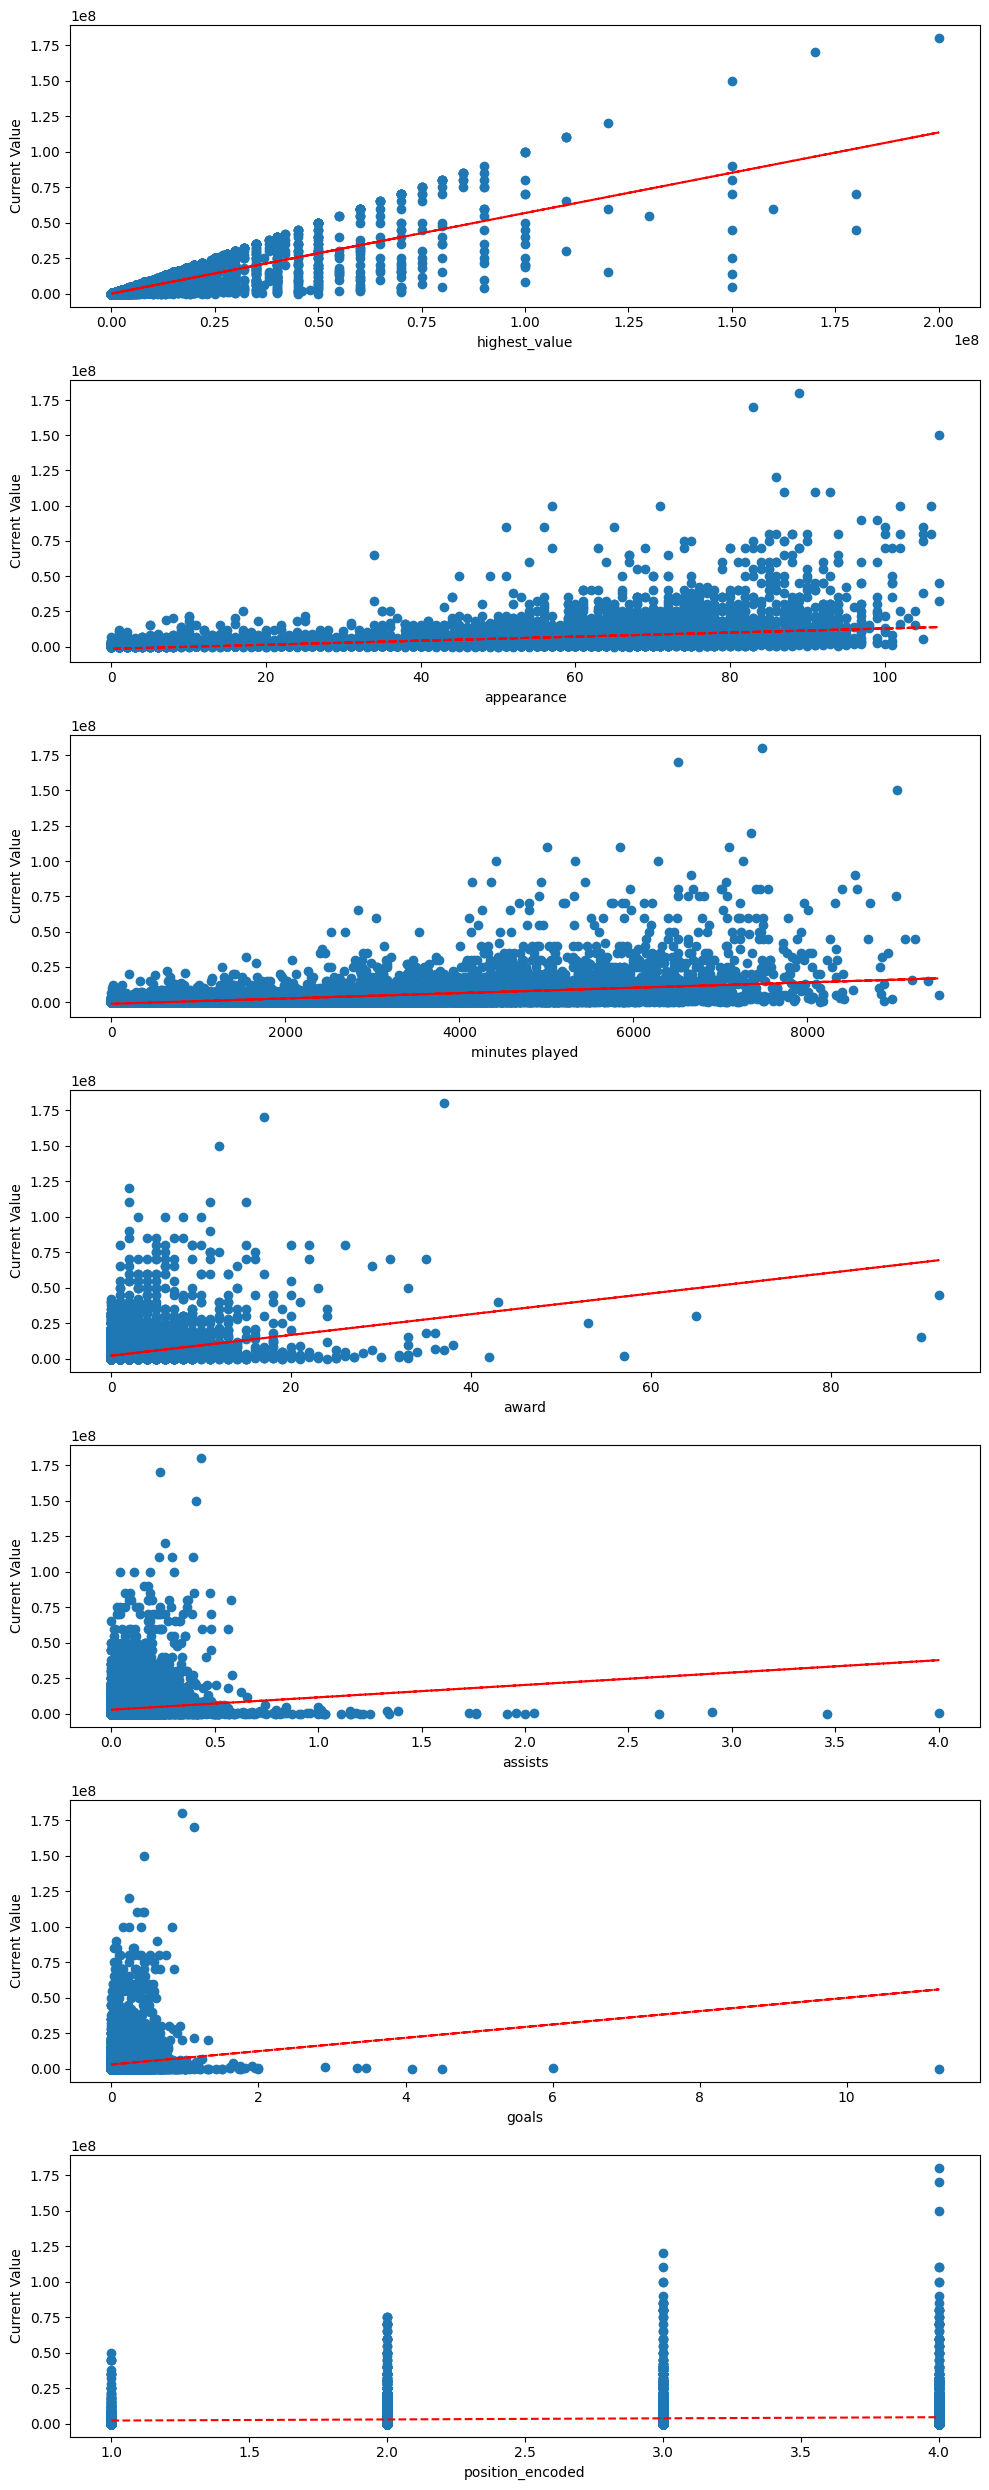

In [13]:
# Plotting how current value changes with each feature given us in the Kaggle file
features = ['highest_value', 'appearance', 'minutes played', 'award', 'assists', 'goals', 'position_encoded']
current_value = dfFootballPlayers['current_value']

fig, axes = plt.subplots(len(features), 1, figsize=(10, 25))

for i, feature in enumerate(features):
    axes[i].scatter(dfFootballPlayers[feature], current_value)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Current Value')
    z = np.polyfit(dfFootballPlayers[feature], current_value, 1)
    p = np.poly1d(z)
    axes[i].plot(dfFootballPlayers[feature], p(dfFootballPlayers[feature]), "r--")

plt.tight_layout()
plt.show()